In [2]:
# 패키지 불러오기

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [9]:
# 데이터구성

In [13]:
df = pd.read_csv("통신고객이탈.csv", engine='python')
df.isnull().sum()
df_x = df.drop(['CHURN','CUSTOMER_ID'], axis=1)

In [14]:
df['CHURN'] = np.where(df['CHURN'] == 'Active', 0, 1)
df

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,1,K413330,M,19,Play 100,SOP10,Med,17.40,12,60,100.8,27,59.4,127,628.2
926,1,K413410,F,59,Play 100,SOP20,Med,17.37,15,82,130.2,12,25.8,357,650.7
927,1,K415490,F,33,Play 300,S50,Med,44.93,12,174,286.2,25,67.0,596,1039.0
928,1,K415880,F,25,Play 300,S50,Med,40.43,14,315,552.0,0,0.0,609,1188.3


In [19]:
df_x = pd.get_dummies(df_x)
df_x

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,19,17.40,12,60,100.8,27,59.4,127,628.2,0,...,0,1,0,0,0,0,1,0,0,0
926,59,17.37,15,82,130.2,12,25.8,357,650.7,1,...,0,0,1,0,0,0,1,0,0,0
927,33,44.93,12,174,286.2,25,67.0,596,1039.0,1,...,0,0,0,0,0,0,1,0,0,0
928,25,40.43,14,315,552.0,0,0.0,609,1188.3,1,...,0,0,0,0,0,0,1,0,0,0


In [20]:
df_y = df['CHURN']


In [21]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y, test_size =0.3, random_state=1234)
print("train data X size : ", df_train_x.shape)
print("train data Y size : ", df_train_y.shape)
print("test data X size : " ,df_test_x.shape)
print("test data Y size : " ,df_test_x.shape)

train data X size :  (651, 33)
train data Y size :  (651,)
test data X size :  (279, 33)
test data Y size :  (279, 33)


In [22]:
tree_uncusomized = DecisionTreeClassifier(random_state=1234)
tree_uncusomized.fit(df_train_x, df_train_y);

print("Accuracy on training set ", tree_uncusomized.score(df_train_x, df_train_y))
print("Accuracy on test set ", tree_uncusomized.score(df_test_x, df_test_y))

Accuracy on training set  1.0
Accuracy on test set  0.8530465949820788


In [23]:
train_accuracy = []
test_accuracy = []
para_depth = [depth for depth in range(1,11)]
for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(random_state=1234, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainScore"] = train_accuracy
df_accuracy_depth["TestScore"] = test_accuracy
df_accuracy_depth.round(3)


,Depth,TrainScore,TestScore
0,1,0.839,0.860
1,2,0.866,0.889
2,3,0.889,0.910
3,4,0.892,0.910
4,5,0.920,0.903
5,6,0.931,0.875
6,7,0.951,0.860
7,8,0.959,0.842
8,9,0.963,0.853
9,10,0.972,0.857


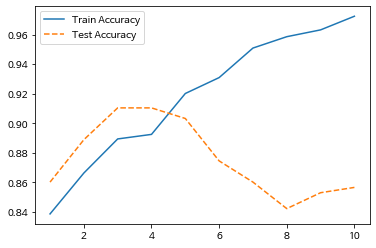

In [24]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

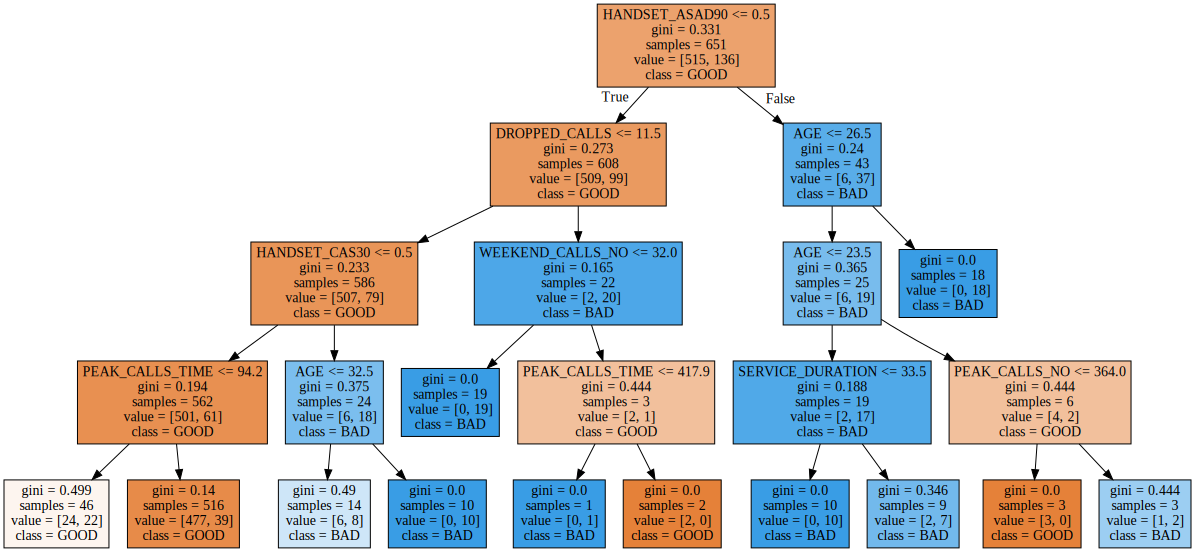

In [25]:
v_feature_name = df_x.columns
tree_low = DecisionTreeClassifier(random_state=1234, max_depth=4)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file="tree_low.dot", class_names=["GOOD", "BAD"], feature_names = v_feature_name, impurity=True, filled=True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


In [26]:
train_accuracy = []
test_accuracy = []
para_split = [n_split * 5 for n_split in range(1,11)]
for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(random_state=1234, max_depth = 4, min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainScore"] = train_accuracy
df_accuracy_split["TestScore"] = test_accuracy
df_accuracy_split.round(3)


,MinSamplesSplit,TrainScore,TestScore
0,5,0.891,0.910
1,10,0.889,0.910
2,15,0.889,0.910
3,20,0.889,0.910
4,25,0.888,0.914
5,30,0.885,0.914
6,35,0.885,0.914
7,40,0.885,0.914
8,45,0.885,0.914
9,50,0.885,0.914


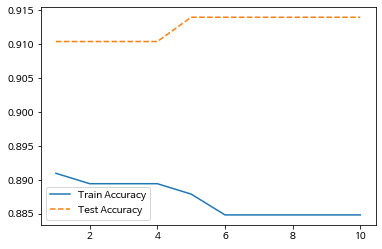

In [27]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle="--", label= "Test Accuracy")
plt.legend()

In [28]:
train_accuracy = []
test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(random_state=1234, min_samples_leaf=v_min_samples_leaf, min_samples_split=20, 
                                max_depth=4)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainScore"] = train_accuracy
df_accuracy_leaf["TestScore"] = test_accuracy

df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,2,0.889,0.910
1,4,0.888,0.907
2,6,0.888,0.914
3,8,0.885,0.910
4,10,0.885,0.914
5,12,0.885,0.914
6,14,0.885,0.914
7,16,0.885,0.914
8,18,0.885,0.914
9,20,0.885,0.914


In [29]:
tree_final = DecisionTreeClassifier(random_state=1234, min_samples_leaf=6, min_samples_split=20, max_depth=4)
tree_final.fit(df_train_x, df_train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [30]:
# 최종모델평가

In [31]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy :", tree_final.score(df_test_x, df_test_y))
print("Confusion matrix:\n", confusion_matrix(df_test_y, y_pred))

Accuracy : 0.9139784946236559
Confusion matrix:
 [[228   7]
 [ 17  27]]


In [32]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.375
2,DROPPED_CALLS,0.244
20,HANDSET_CAS30,0.182
4,PEAK_CALLS_TIME,0.131
0,AGE,0.069
30,USAGE_BAND_MedHigh,0.000
29,USAGE_BAND_Med,0.000
28,USAGE_BAND_Low,0.000
27,USAGE_BAND_High,0.000
18,HANDSET_BS110,0.000


Text(0, 0.5, '변수')

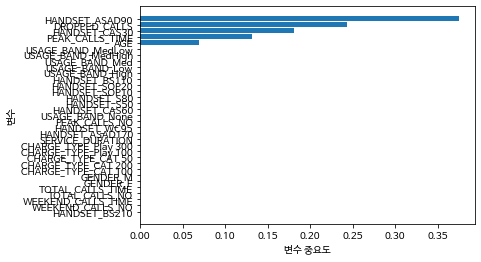

In [33]:
df_importance.sort_values("Importance", ascending = True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [34]:
estimator = DecisionTreeClassifier()
param_grid = {"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}

grid_dt = GridSearchCV(estimator,param_grid, scoring="accuracy", n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print("best model : ", grid_dt.best_estimator_)
print("best parameter: ", grid_dt.best_params_)
print("best score : ", grid_dt.best_score_.round(3))




/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best model :  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
best parameter:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20}
best score :  0.899


In [37]:
pip install opencv-python


     |████████████████████████████████| 28.2MB 2.8MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
import cv2